## Zadatak 1: Metod uzrokovanja sa odbacivanjem i Gibbsov metod

In [13]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Definisanje verovatnoća

# P(a-), P(a+)
P_a = [0.6, 0.4] 

# P(b | a-), P(b | a+)
P_b_given_a = {0: [0.7, 0.3], 1: [0.2, 0.8]}  

# P(c- | a-), P(c- | a+)
P_c_given_a = {0: 0.7, 1: 0.3} 

# P(e- | b, c)
P_e_given_bc = {(0, 0): 0.1, (0, 1): 0.5, (1, 0): 0.2, (1, 1): 0.8}  

# P(f- | e-), P(f+ | e+)
P_f_given_e = [0.4, 0.6]  

# P(g- | e-), P(g+ | e+)
P_g_given_e = [0.8, 0.3]  

# Broj uzoraka
N = 10000

## Metod uzorkovanja sa odbacivanjem:

Metod uzorkovanja sa odbacivanjem je Monte Carlo metoda koja se koristi za generisanje uzoraka iz složenih distribucija verovatnoća. Ideja je generisati uzorke iz jednostavnije distribucije i odbaciti one uzorke koji ne zadovoljavaju uslove.

Postupak:

1) Generiši slučajnu vrednost za svaku promenljivu u skladu sa njihovim marginalnim verovatnoćama.
2) Ako generisani uzorak zadovoljava uslove (npr. ako su f i g jednaki 1), zadrži uzorak.
3) Ponovi korake 2-3 sve dok ne dobiješ dovoljan broj uzoraka.

In [15]:
def generate_sample():
    
    """
    Generiše uzorke iz distribucije verovatnoća definisane Bayesovom mrežom.

    Parametri:
        N (int): Broj uzoraka.

    Povratna vrednost:
        list: Lista generisanih uzoraka (a, b, c, e, f, g).
    """
  
    # Generisanje  uzorka

    # Generiši vrednost za a prema marginalnoj verovatnoći P(a)
    a = 0 if random.random() < P_a[0] else 1

    # Generiši vrednost za b prema uslovnoj verovatnoći P(b | a)
    b = 0 if random.random() < P_b_given_a[a][0] else 1

    # Generiši vrednost za c prema uslovnoj verovatnoći P(c | a)
    c = 0 if random.random() < P_c_given_a[a] else 1

    # Generiši vrednost za e prema uslovnoj verovatnoći P(e | b, c)
    e = 0 if random.random() < P_e_given_bc[(b, c)] else 1

    # Generiši vrednost za f prema uslovnoj verovatnoći P(f | e)
    f = 0 if random.random() < P_f_given_e[e] else 1

    # Generiši vrednost za g samo ako je f+ (f zadovoljava uslov)
    if f == 1:
        # Generiši vrednost za g prema uslovnoj verovatnoći P(g | e)
        g = 0 if random.random() < P_g_given_e[e] else 1
    else:
        g = None  # Ako f nije zadovoljio uslov, postavljamo g na None

    return a, b, c, e, f, g

In [16]:
# UZROKOVANJE SA ODBACIVANJEM
# Lista za čuvanje odbiraka koji zadovoljavaju uslov
rej_samples = []

# Uzorkovanje sa odbacivanjem
while len(rej_samples) < 100:

    #Lista za cuvanje N odbiraka
    samples = []
    
    # Generisanje N uzoraka
    samples = [generate_sample() for _ in range(N)]
    
    # Provera uslova za uzorak
    for sample in samples:
        if sample[4] == 1:  # Provera da li je f+ (ako nije, preskačemo)
            if sample[5] == 1:  # Provera da li je g+ (ako nije, preskačemo)
                    rej_samples.append(sample)
                    
# Računanje procene za P(c+ | f+, g+)
p_c_plus = sum(1 for sample in rej_samples if sample[2] == 1) / len(rej_samples)

# Ispisivanje rezultata
print(f'Prosečna procena za P(c+ | f+, g+): {p_c_plus:.6f}')

Prosečna procena za P(c+ | f+, g+): 0.374341


In [21]:
# OBICNO UZROKOVANJE
# Lista za čuvanje odbiraka koji zadovoljavaju uslov
rej_samples = []

for _ in range(100):
    
    # Generisanje N uzoraka
    samples = [generate_sample() for _ in range(N)]
        
    # Filtriranje uzoraka sa f+ i g+
    filtered_samples = [sample for sample in samples if sample[4] == 1 and sample[5] == 1]  
    # Brojanje c+ među filtriranim uzorcima
    count_c_plus = sum(1 for sample in filtered_samples if sample[2] == 1) 
    # Računanje P(c+ | f+, g+) i dodavanje u listu
    rej_samples.append(count_c_plus / len(filtered_samples))  
    
# Ispisujemo prosečnu procenu za P(c+ | f+, g+)
print(f'Prosečna procena za P(c+ | f+, g+): {sum(rej_samples) / 100}')

Prosečna procena za P(c+ | f+, g+): 0.36128535638153525


## Gibbsov metod:

Gibbsov metod je Monte Carlo Markovljev lanac (MCMC) metod koji se koristi za generisanje uzoraka iz složenih distribucija verovatnoća. Ideja je iterativno generisati uzorke za svaku promenljivu u distribuciji, koristeći trenutne vrednosti svih ostalih promenljivih. Ovaj proces konvergira ka stacionarnoj raspodeli koja predstavlja željenu distribuciju. 

Postupak:
1) Inicijalizcija.
2) Generisanje odbiaraka za nedokazne promenljive, dok su dokazne promenjljive fiksirane na zeljenu vrednost.
3) Proveravamo ugorevanje
4) Nakon ugorevanja prebrojavamo odbirke koji su c+

Osobine:

1) Ugorevanje: se odnosi na početni period iteracija u kojima algoritam konvergira ka stacionarnoj raspodeli, ali se uzorci iz tog perioda ne koriste za analizu. Ovi početni uzorci se često odbacuju ili "ugorevaju" jer ne reflektuju dovoljno dobro stacionarnu raspodelu. Gibbsov metod konvergira ka stacionarnoj raspodeli nakon dovoljno mnogo iteracija. To znači da uzorci generisani Gibbsovim metodom odražavaju raspodelu koju želimo uzorkovati.

2) Lokalna Markovljeva svojstva: Gibbsov metod koristi lokalna Markovljeva svojstva, što znači da uzorak za svaku promenljivu generiše na osnovu trenutnih vrednosti ostalih promenljivih. Ova lokalna zavisnost olakšava generisanje uzoraka u složenim modelima.


In [70]:
def gibbs_sampling(N):
    
    """
    Generiše uzorke korišćenjem Gibbsovog uzorkovanja i procenjuje P(c+ | f+, g+).

    Parametri:
        N (int): Broj iteracija Gibbsovog uzorkovanja.

    Povratna vrednost:
        float: Procena verovatnoće P(c+ | f+, g+).
    """
    
    # Definisanje uslovnih verovatnoća
    P_a = np.array([0.6, 0.4])  # Marginalne verovatnoće za a
    P_b_given_a = np.array([[0.7, 0.2], [0.3, 0.8]])  # Uslovne verovatnoće P(b | a)
    P_c_given_a = np.array([[0.7, 0.3], [0.3, 0.7]])  # Uslovne verovatnoće P(c | a)
    P_e_given_bc = np.zeros((2, 2, 2))  # Uslovne verovatnoće P(e | b, c)
    P_e_given_bc[:, :, 0] = np.array([[0.1, 0.5], [0.2, 0.8]])  # Kada e = 0
    P_e_given_bc[:, :, 1] = np.array([[0.9, 0.5], [0.8, 0.2]])  # Kada e = 1
    P_d_given_b = np.array([[0.4, 0.8], [0.6, 0.2]])  # Uslovne verovatnoće P(d | b)
    P_f_given_e = np.array([0.6, 0.4])  # Uslovne verovatnoće P(f | e)
    P_g_given_e = np.array([0.2, 0.7])  # Uslovne verovatnoće P(g | e)

    # Inicijalizacija promenljivih
    a_staro = 1
    b_staro = 1
    c_staro = 1
    d_staro = 1
    e_staro = 1
    f_staro = 1
    g_staro = 1

    # Brojači za procenu verovatnoće
    Br_zdruzeno = 0
    br_odbiraka = 0

    for i in range(N):
        # Uzorkovanje za a
        p_a_plus = P_b_given_a[b_staro, 1] * P_c_given_a[c_staro, 1] * P_a[1]  # nenormalizovana verovatnoća za a=1
        p_a_minus = P_b_given_a[b_staro, 0] * P_c_given_a[c_staro, 0] * P_a[0]  # nenormalizovana verovatnoća za a=0
        alpha = 1 / (p_a_plus + p_a_minus)  # normalizaciona konstanta
        p_a_plus = alpha * p_a_plus  # normalizovana verovatnoća za a=1
        a_staro = int(np.random.rand() < p_a_plus)  # uzorkovanje nove vrednosti za a

        # Uzorkovanje za b
        p_b_plus = P_e_given_bc[1, c_staro, e_staro] * P_d_given_b[d_staro, 1] * P_b_given_a[1, a_staro]  # nenormalizovana verovatnoća za b=1
        p_b_minus = P_e_given_bc[0, c_staro, e_staro] * P_d_given_b[d_staro, 0] * P_b_given_a[0, a_staro]  # nenormalizovana verovatnoća za b=0
        alpha = 1 / (p_b_plus + p_b_minus)  # normalizaciona konstanta
        p_b_plus = alpha * p_b_plus  # normalizovana verovatnoća za b=1
        b_staro = int(np.random.rand() < p_b_plus)  # uzorkovanje nove vrednosti za b

        # Uzorkovanje za d
        d_staro = int(np.random.rand() < P_d_given_b[1, b_staro])  # uzorkovanje nove vrednosti za d prema P(d | b)

        # Uzorkovanje za c
        p_c_plus = P_e_given_bc[b_staro, 1, e_staro] * P_c_given_a[1, a_staro]  # nenormalizovana verovatnoća za c=1
        p_c_minus = P_e_given_bc[b_staro, 0, e_staro] * P_c_given_a[0, a_staro]  # nenormalizovana verovatnoća za c=0
        alpha = 1 / (p_c_plus + p_c_minus)  # normalizaciona konstanta
        p_c_plus = alpha * p_c_plus  # normalizovana verovatnoća za c=1
        c_staro = int(np.random.rand() < p_c_plus)  # uzorkovanje nove vrednosti za c

        # Uzorkovanje za e
        p_e_plus = P_f_given_e[1] * P_g_given_e[1] * P_e_given_bc[b_staro, c_staro, 1]  # nenormalizovana verovatnoća za e=1
        p_e_minus = P_f_given_e[0] * P_g_given_e[0] * P_e_given_bc[b_staro, c_staro, 0]  # nenormalizovana verovatnoća za e=0
        alpha = 1 / (p_e_plus + p_e_minus)  # normalizaciona konstanta
        p_e_plus = alpha * p_e_plus  # normalizovana verovatnoća za e=1
        e_staro = int(np.random.rand() < p_e_plus)  # uzorkovanje nove vrednosti za e

        # Računanje združene verovatnoće
        p_zdruzena = (P_a[a_staro] * P_b_given_a[b_staro, a_staro] * P_c_given_a[c_staro, a_staro] * 
                      P_d_given_b[d_staro, b_staro] * P_e_given_bc[b_staro, c_staro, e_staro] * 
                      P_f_given_e[e_staro] * P_g_given_e[e_staro])

        # Odbacivanje uzoraka ako je verovatnoća ispod praga
        if p_zdruzena < 0.001:
            continue

        # Brojanje koliko puta je c=1 kada su f i g jednaki 1
        if c_staro == 1:
            Br_zdruzeno += 1
        br_odbiraka += 1

    # Računanje procene verovatnoće P(c+ | f+, g+)
    p_cIfg = Br_zdruzeno / br_odbiraka if br_odbiraka > 0 else 0

    return p_cIfg

In [71]:
# Primer korišćenja
N = 10000
p_c_plus = gibbs_sampling(N)
print(f'Procena verovatnoće P(c+ | f+, g+): {p_c_plus:.6f}')

Procena verovatnoće P(c+ | f+, g+): 0.363150


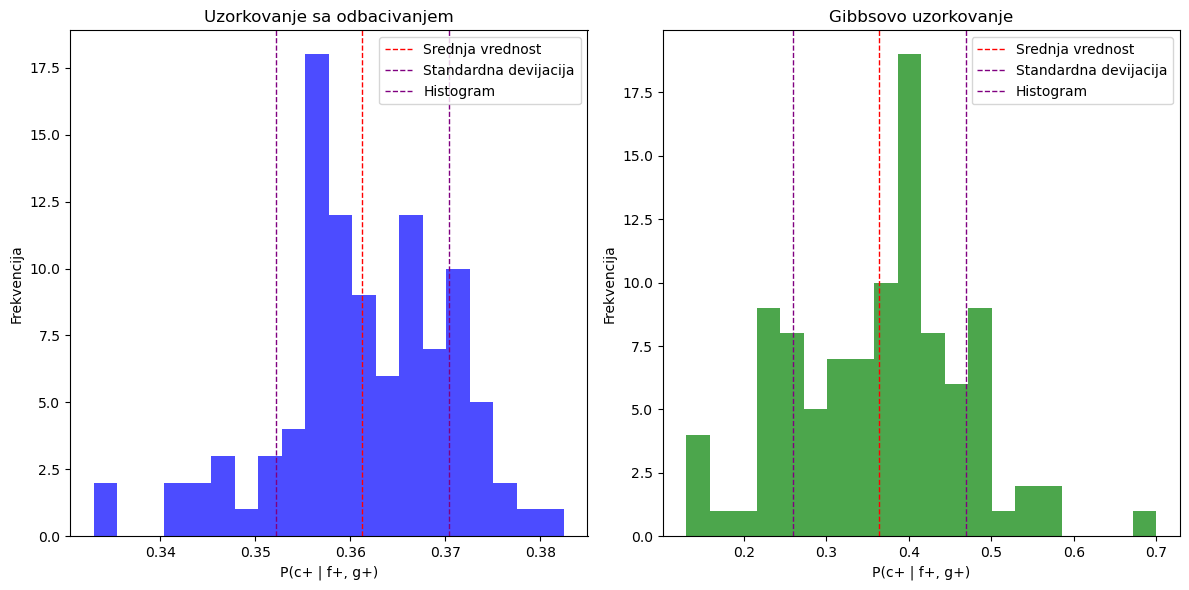

Srednja vrednost (uzorkovanje sa odbacivanjem): 0.36128535638153514
Standardna devijacija (uzorkovanje sa odbacivanjem): 0.00914032804455535
Srednja vrednost (Gibbsovo uzorkovanje): 0.3642446620209324
Standardna devijacija (Gibbsovo uzorkovanje): 0.10448364901273341
Vrednost dobijena metodom eliminacije: 0.3613643


In [72]:
# Plotovanje histograma
plt.figure(figsize=(12, 6))

# Histogram za uzorkovanje sa odbacivanjem
plt.subplot(1, 2, 1)

# Plotovanje histograma za uzorkovanje sa odbacivanjem
plt.hist(rej_samples, bins=20, alpha=0.7, color='blue')  
# Dodavanje linije srednje vrednosti
plt.axvline(np.mean(rej_samples), color='red', linestyle='dashed', linewidth=1)  
# Dodavanje linije standardne devijacije
plt.axvline(np.mean(rej_samples) + np.std(rej_samples), color='purple', linestyle='dashed', linewidth=1)  
plt.axvline(np.mean(rej_samples) - np.std(rej_samples), color='purple', linestyle='dashed', linewidth=1)  
plt.title('Uzorkovanje sa odbacivanjem')
plt.xlabel('P(c+ | f+, g+)')
plt.ylabel('Frekvencija')
plt.legend(['Srednja vrednost', 'Standardna devijacija', 'Histogram'])

# Histogram za Gibbsovo uzorkovanje
plt.subplot(1, 2, 2)

# Plotovanje histograma za Gibbsovo uzorkovanje
plt.hist(gibbs_samples_list, bins=20, alpha=0.7, color='green')  
# Dodavanje linije srednje vrednosti
plt.axvline(np.mean(gibbs_samples_list), color='red', linestyle='dashed', linewidth=1)  
# Dodavanje linije standardne devijacije
plt.axvline(np.mean(gibbs_samples_list) + np.std(gibbs_samples_list), color='purple', linestyle='dashed', linewidth=1)  
plt.axvline(np.mean(gibbs_samples_list) - np.std(gibbs_samples_list), color='purple', linestyle='dashed', linewidth=1)  
plt.title('Gibbsovo uzorkovanje')
plt.xlabel('P(c+ | f+, g+)')
plt.ylabel('Frekvencija')
plt.legend(['Srednja vrednost', 'Standardna devijacija', 'Histogram'])

# Prikaz svih plotova
plt.tight_layout()
plt.show()

# Analiza
# Računanje srednje vrednosti za uzorkovanje sa odbacivanjem
mean_rej = np.mean(rej_samples)  
# Računanje standardne devijacije za uzorkovanje sa odbacivanjem
std_rej = np.std(rej_samples)  
# Računanje srednje vrednosti za Gibbsovo uzorkovanje
mean_gibbs = np.mean(gibbs_samples_list) 
# Računanje standardne devijacije za Gibbsovo uzorkovanje
std_gibbs = np.std(gibbs_samples_list)  

print(f'Srednja vrednost (uzorkovanje sa odbacivanjem): {mean_rej}')
print(f'Standardna devijacija (uzorkovanje sa odbacivanjem): {std_rej}')
print(f'Srednja vrednost (Gibbsovo uzorkovanje): {mean_gibbs}')
print(f'Standardna devijacija (Gibbsovo uzorkovanje): {std_gibbs}')
print(f'Vrednost dobijena metodom eliminacije: 0.3613643')

## Zadatak 2: Rekonstruisanje putanje kojom se kretao robot pomocu cesljastog filtra

Čestični filtar (Particle Filter) je statistički metod koji se koristi za rešavanje problema procene stanja u dinamičkim sistemima gde postoji nelinearnost, nepravilnost i/ili šum u merenjima. Ideja iza čestičnog filtra je da se koriste čestice (ili uzorci) za aproksimaciju aposteriorne raspodele stanja sistema. Ove čestice se propagiraju kroz prostor stanja koristeći model kretanja, ažuriraju svoje težine na osnovu merenja koristeći model merenja, i zatim se reuzorkuju prema njihovim težinama.

Čestični filtar je "čestičasti" jer koristi ansambl čestica (tj. uzoraka) da bi reprezentovao aposteriornu raspodelu stanja sistema. Svaka čestica predstavlja jedno moguće stanje sistema u određenom trenutku.

U kontekstu problema koji ste opisali, čestični filtar se primenjuje za rekonstrukciju putanje robota na osnovu uzoraka stanja koje generiše model kretanja i merenja. Na osnovu merenja, težine čestica se ažuriraju, a zatim se čestice reuzorkuju kako bi se fokusirali na regione prostora stanja koji su najverovatniji.

U ovoj implementaciji čestičnog filtra , koristimo čestice za praćenje mogućih pozicija robota u ravni, ažurirajući njihove težine na osnovu merenja udaljenosti i ugla, kao i koristeći model kretanja da predvidimo sledeće pozicije. Nakon toga, reuzorkovanje se primenjuje kako bi se održala diverzitet čestica i izbegla konvergencija ka najsličnijoj tački.

Cestični filtar omogućava iterativno ažuriranje procene stanja sistema na osnovu novih merenja, koristeći ansambl čestica za reprezentaciju posteriorne raspodele stanja sistema.

Svaka čestica predstavlja jednu moguću poziciju robota u dvodimenzionalnom prostoru.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace

In [48]:
# Učitavanje podataka
data = pd.read_csv('observations.csv')
distances = data.iloc[:, 0].values
angles = data.iloc[:, 1].values

In [49]:
# Parametri

# Broj odbiraka
num_particles = 1000

# Intenzitet vektora brzine objekta
speed = 0.5

# Merenja su vrsena sa periodom odabiranja
dt = 1.0

# Verovatnoca da robot promeni pravac vektora brzine 
change_prob = [0.2, 0.4, 0.6, 0.8, 1.0]

# Razlika izmedju novog i predhodnog ugla
max_angle_change = np.pi / 6

# Sum merenja rastojanja
distance_noise_max = 0.6

# Sum merenja ugla 
angle_noise_std = np.pi / 36

In [50]:
# Inicijalizacija čestica
particles = np.random.uniform(-2, 2, (num_particles, 2))
directions = np.random.uniform(-np.pi, np.pi, num_particles)
weights = np.ones(num_particles) / num_particles

In [51]:
# PREDIKCIJA
def motion_model(particles, directions):
    
    """
    Ažurira pozicije i pravce kretanja čestica na osnovu modela kretanja.

    Args:
        particles (np.ndarray): Trenutne pozicije čestica, oblik (num_particles, 2).
        directions (np.ndarray): Trenutni pravci kretanja čestica, oblik (num_particles,).

    Returns:
        np.ndarray: Ažurirane pozicije čestica.
        np.ndarray: Ažurirani pravci kretanja čestica.
        
    """
    
    # Generišemo nasumični šum za promenu pravca kretanja unutar [-π/6, π/6]
    noise = np.random.uniform(-max_angle_change, max_angle_change, num_particles)
    
    # Verovatnoća promene pravca kretanja u zavisnosti od vremena proteklog od poslednje promene
    # Određuje da li će pravac kretanja biti promenjen na osnovu verovatnoće koja raste s vremenom
    change = np.random.choice([0, 1], num_particles,
                              # Verovatnoće za izbore 0 i 1
                              # change_prob je lista verovatnoća za promenu pravca koja raste s vremenom.
                              # change_prob[min(t, len(change_prob) - 1)] je verovatnoća da pravac kretanja bude promenjen (vrednost 1)
                              # 1 - change_prob[min(t, len(change_prob) - 1)] je verovatnoća da pravac kretanja neće biti promenjen (vrednost 0)
                              p=[1 - change_prob[min(t, len(change_prob) - 1)], change_prob[min(t, len(change_prob) - 1)]])
    
    # Ažuriramo pravac kretanja, dodajući šum ako je došlo do promene pravca
    # Normalizacija ugla
    directions = (directions + noise * change) % (2 * np.pi)
    
    # Ažuriramo pozicije čestica na osnovu brzine, pravca i vremenskog koraka
    # Projekcija brzine na x osu. Funkcija np.cos(directions) računa kosinus pravca kretanja svake čestice,
    # što daje komponentu brzine u x smeru.
    particles[:, 0] += speed * np.cos(directions) * dt
    # Projekcija brzine na y osu. Funkcija np.sin(directions) računa sinus pravca kretanja svake čestice, 
    # što daje komponentu brzine u y smeru.
    particles[:, 1] += speed * np.sin(directions) * dt
    
    return particles, directions

In [52]:
# TEZINJENJE
def measurement_model(particles, measurement):
    
    """
    Izračunava težine čestica na osnovu poređenja predikovanih i izmerenih vrednosti udaljenosti i ugla.

    Args:
        particles (np.ndarray): Pozicije čestica, oblik (num_particles, 2).
        measurement (tuple): Izmerene vrednosti udaljenosti (ρ) i ugla (θ).

    Returns:
        np.ndarray: Težine čestica na osnovu merenja.
        
    """
    
    # Raspakivanje izmerenih vrednosti udaljenosti i ugla
    distance, angle = measurement  

    # Predikcija udaljenosti i ugla na osnovu trenutnih pozicija čestica
    # Računa Euklidsku udaljenost (normu) - sqrt(x^2 + y^2) svake čestice od koordinatnog početka 
    # axis = 1 norma se racuna za svaku cesticu posebno
    predicted_distances = np.linalg.norm(particles, axis=1)
    # Niz koji sadrži uglove (u radijanima) između svake čestice i koordinatnog početka.
    predicted_angles = np.arctan2(particles[:, 1], particles[:, 0])

    # Izračunavanje grešaka između izmerenih i predikovanih vrednosti
    distance_errors = distance - predicted_distances
    angle_errors = angle - predicted_angles

    ######
    # Izračunavanje težina na osnovu grešaka udaljenosti i ugla
    distance_weights = norm.pdf(distance_errors, 0, distance_noise_max)
    angle_weights = laplace.pdf(angle_errors, 0, angle_noise_std)

    # Kombinovanje težina udaljenosti i ugla da bi se dobile konačne težine čestica
    # Ukupne verovatnoće da su čestice tačno procenile stvarnu poziciju na osnovu oba merenja, udaljenosti i ugla
    return distance_weights * angle_weights

In [53]:
# REUZORKOVANJE
def resample(particles, weights):
    
    """
    Reuzorkuje čestice na osnovu njihovih težina.

    Args:
        particles (np.ndarray): Pozicije čestica, oblik (num_particles, 2).
        weights (np.ndarray): Težine čestica, oblik (num_particles,).

    Returns:
        np.ndarray: Reuzorkovane pozicije čestica.
        np.ndarray: Jednake težine za sve čestice nakon reuzorkovanja.
        
    """
    
    # Izbor indeksa čestica na osnovu njihovih težina
    # Cestice sa višim težinama ce biti izabrane češće, što poboljšava preciznost procene.
    indices = np.random.choice(range(num_particles), num_particles, p=weights)
    # Reuzorkovanje čestica na osnovu izabranih indeksa
    particles = particles[indices]
    # Postavljanje svih težina čestica na jednake vrednosti nakon reuzorkovanja
    # Nove čestice su sada zastupljene prema svojoj verovatnoći, i nema potrebe da se njihove težine dalje razlikuju.
    # Na ovaj način, sve čestice imaju jednaku šansu da budu izabrane u narednom koraku reuzorkovanja.
    weights = np.ones(num_particles) / num_particles
    
    return particles, weights

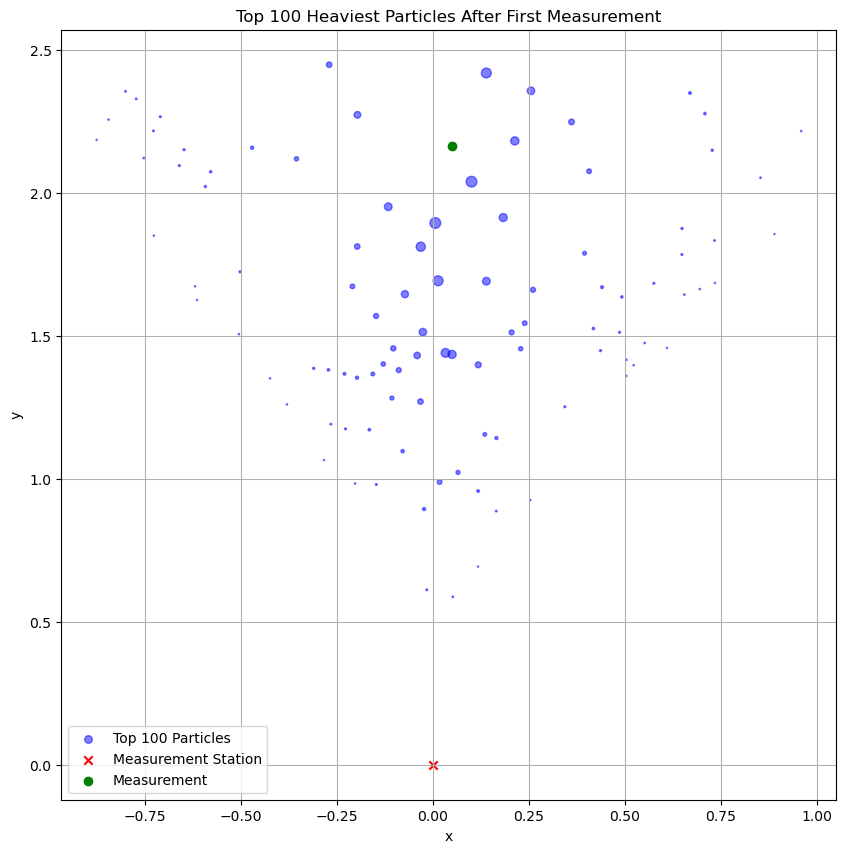

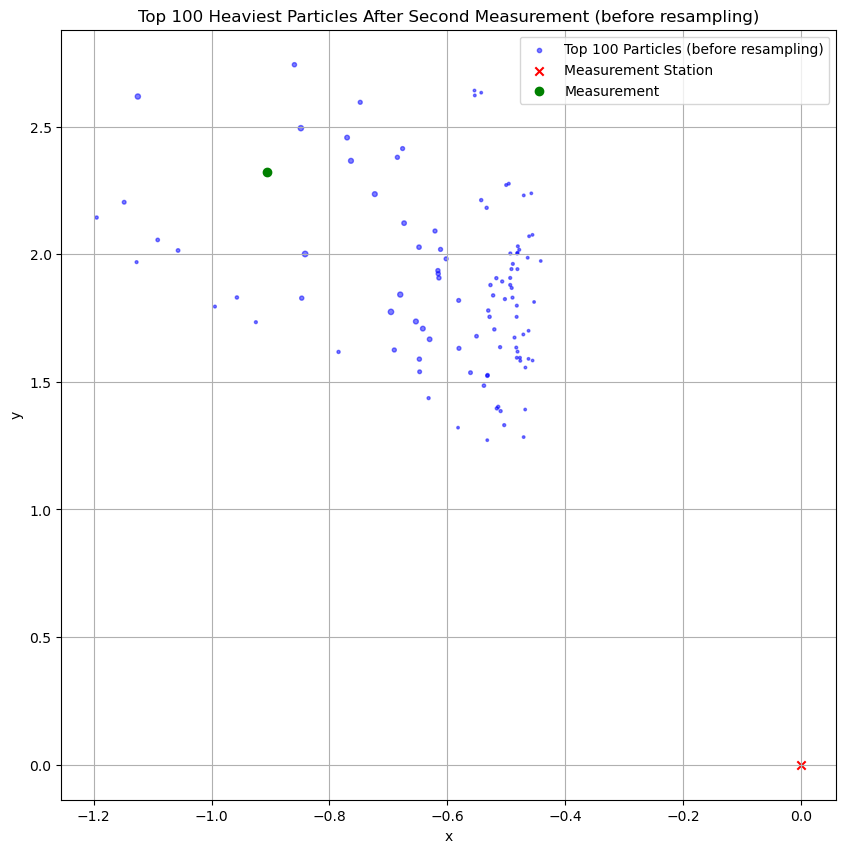

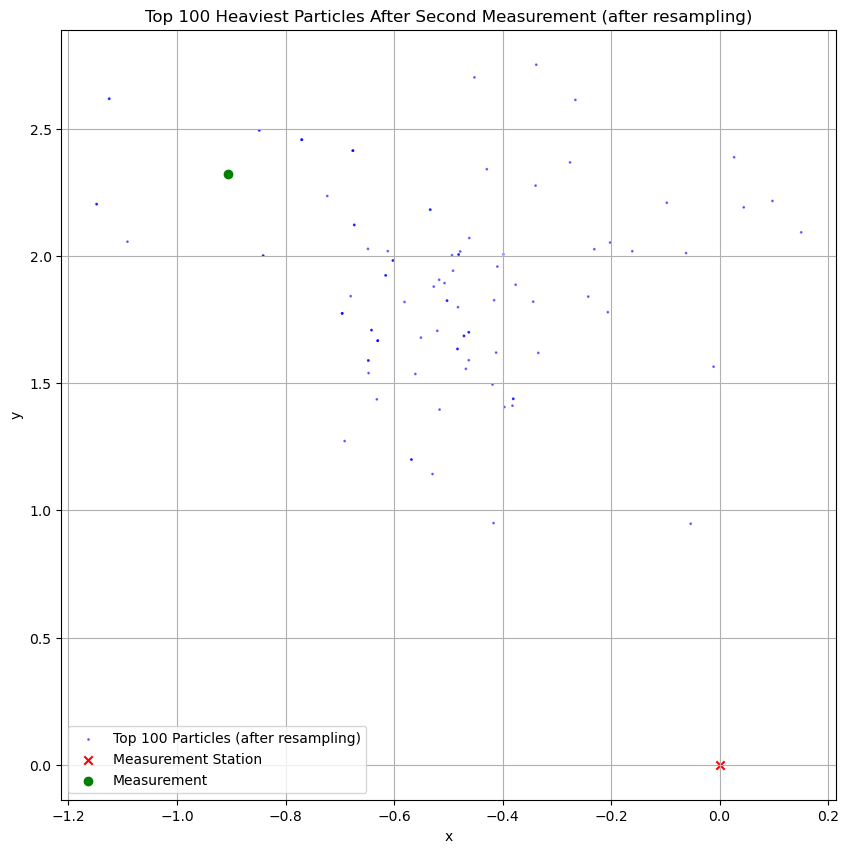

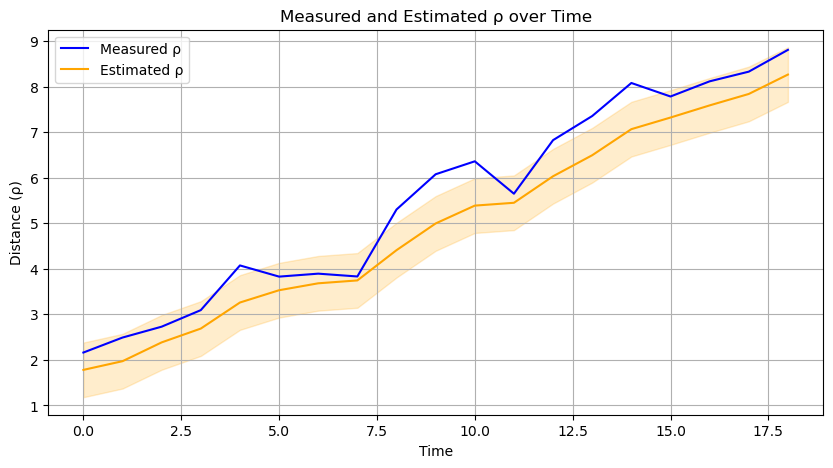

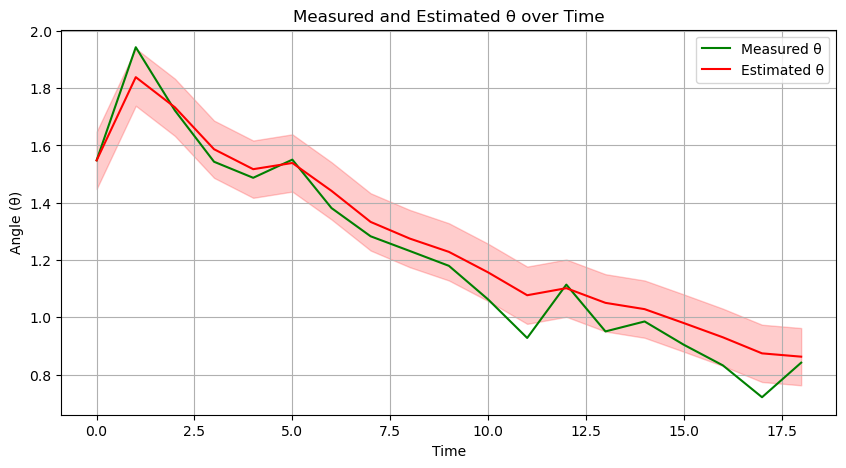

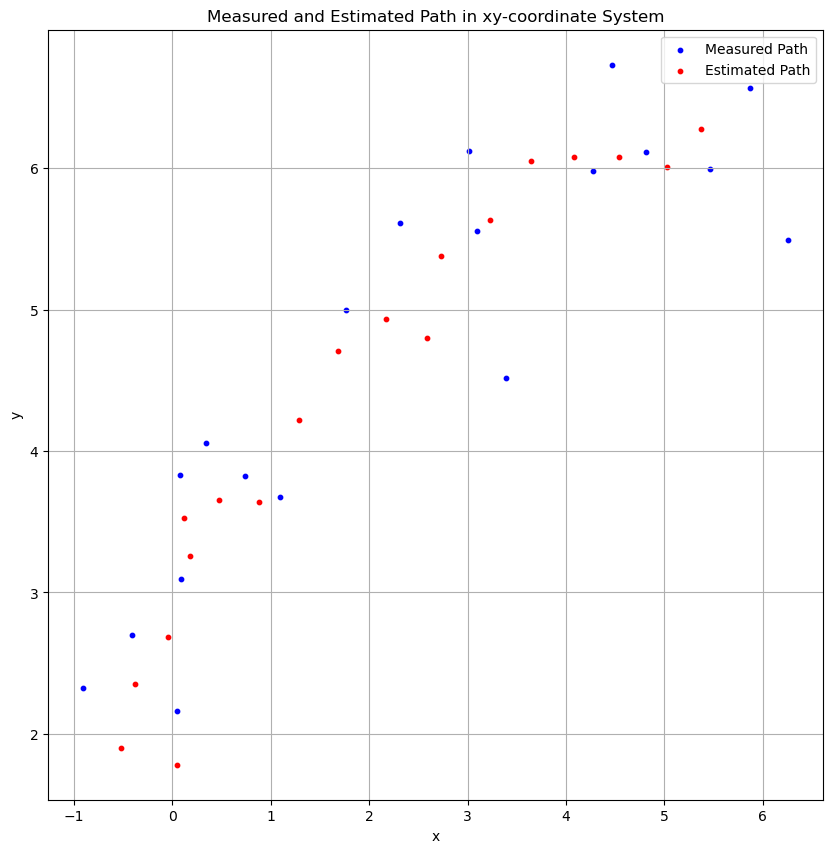

In [54]:
# Definicija praznih listi za merenja
measured_distances = []
measured_angles = []

# Definicija prazne liste za procenjene udaljenosti i uglove
estimated_distances = []
estimated_angles = []

# Definicija praznih listi za čuvanje koordinata
measured_positions = []

# Inicijalizacija čestica
# Jako bitnoo!!!!!
num_particles = 1000  # Primer vrednosti za broj čestica
particles = np.random.uniform(-2, 2, (num_particles, 2))
directions = np.random.uniform(-np.pi, np.pi, num_particles)
weights = np.ones(num_particles) / num_particles

# ESTIMACIJA
for t in range(len(distances)):
    measurement = (distances[t], angles[t])
    
    # Predikcija
    particles, directions = motion_model(particles, directions)
    
    # Ažuriranje težina
    weights *= measurement_model(particles, measurement)
    weights += 1.e-300  # Izbegavanje nula
    weights /= sum(weights)  # Normalizacija
    
    # Sortiranje čestica po težini
    sorted_indices = np.argsort(weights)[::-1]  # Sortiranje u opadajućem redosledu
    top_100_indices = sorted_indices[:100]  # Uzimanje prvih 100 indeksa
    top_100_particles = particles[top_100_indices]
    top_100_weights = weights[top_100_indices]

    # Koordinate merenja
    measured_x = measurement[0] * np.cos(measurement[1])
    measured_y = measurement[0] * np.sin(measurement[1])
    
    # Prikazivanje pozicija najtežih čestica i merenja nakon prvog i drugog merenja
    if t == 0:
        plt.figure(figsize=(10, 10))
        plt.scatter(top_100_particles[:, 0], top_100_particles[:, 1], 
                    s=top_100_weights * 1000,  # Skala za veličinu markera
                    c='blue', alpha=0.5, label='Top 100 Particles')
        # Prikaz nepokretne merne stanice u koordinatnom sistemu
        plt.scatter(0, 0, c='red', marker='x', label='Measurement Station')

        # Prikaz trenutnog merenja (udaljenosti i ugla)
        measured_x = measurement[0] * np.cos(measurement[1])
        measured_y = measurement[0] * np.sin(measurement[1])
        plt.scatter(measured_x, measured_y, c='green', marker='o', label='Measurement')
        
        plt.title('Top 100 Heaviest Particles After First Measurement')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

    elif t == 1:
        plt.figure(figsize=(10, 10))
        plt.scatter(top_100_particles[:, 0], top_100_particles[:, 1], 
                    s=top_100_weights * 1000,  # Skala za veličinu markera
                    c='blue', alpha=0.5, label='Top 100 Particles (before resampling)')
        # Prikaz nepokretne merne stanice u koordinatnom sistemu
        plt.scatter(0, 0, c='red', marker='x', label='Measurement Station')

        # Prikaz trenutnog merenja (udaljenosti i ugla)
        measured_x = measurement[0] * np.cos(measurement[1])
        measured_y = measurement[0] * np.sin(measurement[1])
        plt.scatter(measured_x, measured_y, c='green', marker='o', label='Measurement')
        
        plt.title('Top 100 Heaviest Particles After Second Measurement (before resampling)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Reuzorkovanje
    particles, weights = resample(particles, weights)

    if t == 1:
        # Sortiranje čestica po težini nakon resamplovanja
        sorted_indices = np.argsort(weights)[::-1]  # Sortiranje u opadajućem redosledu
        top_100_indices = sorted_indices[:100]  # Uzimanje prvih 100 indeksa
        top_100_particles = particles[top_100_indices]
        top_100_weights = weights[top_100_indices]

        plt.figure(figsize=(10, 10))
        plt.scatter(top_100_particles[:, 0], top_100_particles[:, 1], 
                    s=top_100_weights * 1000,  # Skala za veličinu markera
                    c='blue', alpha=0.5, label='Top 100 Particles (after resampling)')
        # Prikaz nepokretne merne stanice u koordinatnom sistemu
        plt.scatter(0, 0, c='red', marker='x', label='Measurement Station')

        # Prikaz trenutnog merenja (udaljenosti i ugla)
        measured_x = measurement[0] * np.cos(measurement[1])
        measured_y = measurement[0] * np.sin(measurement[1])
        plt.scatter(measured_x, measured_y, c='green', marker='o', label='Measurement')

        plt.title('Top 100 Heaviest Particles After Second Measurement (after resampling)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Dodavanje merenja za grafove ρ i θ
    measured_distances.append(measurement[0])
    measured_angles.append(measurement[1])
    
    # Izračunavanje procenjenih ρ i θ na osnovu težina
    estimated_rho = np.average(np.linalg.norm(particles, axis=1), weights=weights)
    estimated_theta = np.average(np.arctan2(particles[:, 1], particles[:, 0]), weights=weights)
    
    # Dodavanje procenjenih ρ i θ za grafove
    estimated_distances.append(estimated_rho)
    estimated_angles.append(estimated_theta)
    
    # Dodavanje pozicija za prikaz
    measured_positions.append((measured_x, measured_y))

# Izračunavanje sigmi za ρ i θ
distance_sigmas = np.array([0.3] * len(measured_distances))
angle_sigmas = np.array([0.05] * len(measured_angles))

# Prikazivanje grafika izmerenih i estimiranih ρ tokom vremena
plt.figure(figsize=(10, 5))
plt.plot(range(len(measured_distances)), measured_distances, label='Measured ρ', color='blue')
plt.plot(range(len(estimated_distances)), estimated_distances, label='Estimated ρ', color='orange')
# Oblast pouzdanosti oko procenjenih vrednosti kako bi se vizualizovala nesigurnost u tim procenama
# Šire oblasti znače veću nesigurnost, dok uže oblasti znače manju nesigurnost
# procenjena vrednost ± 2 * standardna devijacija
plt.fill_between(range(len(estimated_distances)), np.array(estimated_distances) - 2 * np.array(distance_sigmas),
                 np.array(estimated_distances) + 2 * np.array(distance_sigmas), color='orange', alpha=0.2)
plt.title('Measured and Estimated ρ over Time')
plt.xlabel('Time')
plt.ylabel('Distance (ρ)')
plt.legend()
plt.grid(True)
plt.show()

# Prikazivanje grafika izmerenih i estimiranih θ tokom vremena
plt.figure(figsize=(10, 5))
plt.plot(range(len(measured_angles)), measured_angles, label='Measured θ', color='green')
plt.plot(range(len(estimated_angles)), estimated_angles, label='Estimated θ', color='red')
# Oblast pouzdanosti oko procenjenih vrednosti kako bi se vizualizovala nesigurnost u tim procenama
# Šire oblasti znače veću nesigurnost, dok uže oblasti znače manju nesigurnost
# procenjena vrednost ± 2 * standardna devijacija
plt.fill_between(range(len(estimated_angles)), np.array(estimated_angles) - 2 * np.array(angle_sigmas),
                 np.array(estimated_angles) + 2 * np.array(angle_sigmas), color='red', alpha=0.2)
plt.title('Measured and Estimated θ over Time')
plt.xlabel('Time')
plt.ylabel('Angle (θ)')
plt.legend()
plt.grid(True)
plt.show()

# Izračunavanje measured_x i measured_y iz measured_positions
measured_x = [position[0] for position in measured_positions]
measured_y = [position[1] for position in measured_positions]

# Definisanje estimiranih pozicija na osnovu procenjenih rastojanja i uglova
# Koriste polarne koordinate (rastojanje i ugao) za izračunavanje koordinata (x i y)
estimated_x = [rho * np.cos(theta) for rho, theta in zip(estimated_distances, estimated_angles)]
estimated_y = [rho * np.sin(theta) for rho, theta in zip(estimated_distances, estimated_angles)]

# Prikazivanje izmerene i estimirane putanje objekta u xy-koordinatnom sistemu koristeći scatter
plt.figure(figsize=(10, 10))
plt.scatter(measured_x, measured_y, label='Measured Path', color='blue', s=10)  # Manji markeri za bolje razlikovanje tačaka
plt.scatter(estimated_x, estimated_y, label='Estimated Path', color='red', s=10)
plt.title('Measured and Estimated Path in xy-coordinate System')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Prva slika prikazuje pozicije čestica u xy-koordinatnom sistemu nakon prvog merenja pomoću čestičnog filtera.

- Nakon prvog merenja, većina čestica sa većom težinom nalazi se u blizini zelene tačke koja predstavlja merenje. Ovo pokazuje da su čestice koje su bliže merenju dobile veće težine, što je očekivano jer su verovatnije da tačno predstavljaju stvarnu poziciju robota.

- Raspršenje manjih čestica širom koordinatnog sistema može se objasniti inicijalnom raspodelom čestica, koje su postavljene ravnomerno unutar poznatih granica. Te čestice imaju manje težine jer se nalaze dalje od merenja i samim tim su manje verovatno tačne.

- Prikaz pozicija čestica nakon prvog merenja pokazuje kako čestični filter uspešno ažurira težine čestica na osnovu merenja. Čestice koje se nalaze bliže merenju imaju veće težine, što omogućava filteru da se fokusira na verovatnije pozicije robota u narednim iteracijama. Ovaj grafički prikaz jasno ilustruje proces filtriranja i ažuriranja verovatnoća u okviru čestičnog filtera.


Druga slika prikazuje pozicije čestica u xy-koordinatnom sistemu nakon drugog merenja pomoću čestičnog filtera, ali pre resamplovanja.

- Nakon drugog merenja, većina čestica sa većom težinom nalazi se bliže zelenoj tački koja predstavlja drugo merenje. Ovo pokazuje da su čestice koje su bliže novom merenju dobile veće težine, što je očekivano jer su verovatnije da tačno predstavljaju stvarnu poziciju robota.

- Vidljivo je da su čestice sa većom težinom grupisane u oblasti oko novog merenja, ali ima i dosta čestica koje su raspršene širom koordinatnog sistema. Ove čestice imaju manje težine jer su manje verovatno tačne.

- Prikaz pozicija čestica nakon drugog merenja, pre resamplovanja, pokazuje kako čestični filter uspešno ažurira težine čestica na osnovu novog merenja. Čestice koje se nalaze bliže drugom merenju imaju veće težine, što omogućava filteru da se fokusira na verovatnije pozicije robota u narednim iteracijama. Ovaj grafički prikaz jasno ilustruje proces filtriranja i ažuriranja verovatnoća u okviru čestičnog filtera pre nego što se izvrši resamplovanje, koje će dodatno poboljšati koncentraciju čestica oko verovatnije pozicije robota.

Treca slika prikazuje pozicije čestica u xy-koordinatnom sistemu nakon drugog merenja pomoću čestičnog filtera, posle resamplovanja.

- Nakon resamplovanja, vidljivo je da su čestice grupisane bliže zelenoj tački koja predstavlja drugo merenje. To znači da su čestice koje su imale veću težinu (pre resamplovanja) sada duplicirane, dok su čestice sa manjom težinom eliminisane.

- Ova grupacija čestica pokazuje da resamplovanje pomaže čestičnom filteru da se fokusira na verovatnija područja, što povećava preciznost procene pozicije robota.

- Slika nakon resamplovanja pokazuje kako čestični filter efektivno redukuje varijabilnost u pozicijama čestica tako što favorizuje verovatnije pozicije na osnovu zadnjih merenja. Resamplovanje omogućava filteru da se prilagodi i preciznije proceni položaj robota tako što eliminiše manje verovatne pozicije čestica i povećava broj čestica u oblastima sa većom verovatnoćom. Ovo je ključni korak u čestičnom filteru koji osigurava da filter ostane efikasan i precizan tokom vremena.

Cetvrta slika prikazuje izmerenu i estimiranu putanju tokom vremena

- Koriscenjem filtra dobijamo putaju koja vernije oslikava realno kretanje.

Peta slika prikazuje izmereni i estimirani ugao tokom vremena

- Koriscenjem filtra dobijamo ugao koji vernije oslikava realno kretanje.

Setsa slika prikazuje izmerenu i estimiranu putanju objekta u xy-koordinatnom sistemu

- Estimirana putanja dobro prati trajektoriju kretanja.